<a href="https://colab.research.google.com/github/XinXu-ease/XAI-assignment2-9.15/blob/main/XAI_9_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3690047211.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [5]:
#Data Structure
print("Data Structure")
print(f"Dimentions:{df.shape}")
print(f"Data Types:{df.dtypes}")
print(f"Missing Values:{df.isnull().sum()}")

Data Structure
Dimentions:(7043, 21)
Data Types:customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Missing Values:customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contr

In [6]:
#convert variabels such as "Churn" from categorical values into numeric values, 1 indicates (Yes) and 0 indicates (No).
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()
        if set(df[col].unique()).issubset({'Yes','No'}):
            df[col] = df[col].map({'Yes': 1, 'No': 0})
print(f"Data Types:{df.dtypes}")

#convert "totalcharges" into float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Data Types:customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


In [7]:
#Discriptive Statistics
print("Discriptive Statistics")
print(df.describe())

Discriptive Statistics
       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges        Churn  
count       7043.000000     7043.000000   7032.000000  7043.000000  
mean           0.592219       64.761692   2283.300441     0.265370  
std            0.491457       30.090047   2266.771362     0.441561  
min    

In [8]:
#Check for distribution normality
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Check for distribution normality")
print(df[numeric_columns].skew())

Check for distribution normality
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
TotalCharges        0.961642
Churn               1.063031
dtype: float64


In [9]:
#Data Quality
print("Data Quality")
print(df.isnull().sum())

Data Quality
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [10]:
df.loc[df["tenure"] == 0, "TotalCharges"] = 0
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

variable relationships
Correlation Matrix:
                  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
SeniorCitizen          1.000000  0.016479   -0.211185  0.016567      0.008576   
Partner                0.016479  1.000000    0.452676  0.379697      0.017706   
Dependents            -0.211185  0.452676    1.000000  0.159712     -0.001762   
tenure                 0.016567  0.379697    0.159712  1.000000      0.008448   
PhoneService           0.008576  0.017706   -0.001762  0.008448      1.000000   
PaperlessBilling       0.156530 -0.014877   -0.111377  0.006152      0.016505   
MonthlyCharges         0.220173  0.096848   -0.113890  0.247900      0.247398   
TotalCharges           0.103006  0.317504    0.062078  0.826178      0.113214   
Churn                  0.150889 -0.150448   -0.164221 -0.352229      0.011942   

                  PaperlessBilling  MonthlyCharges  TotalCharges     Churn  
SeniorCitizen             0.156530        0.220173      0.103006  0.1

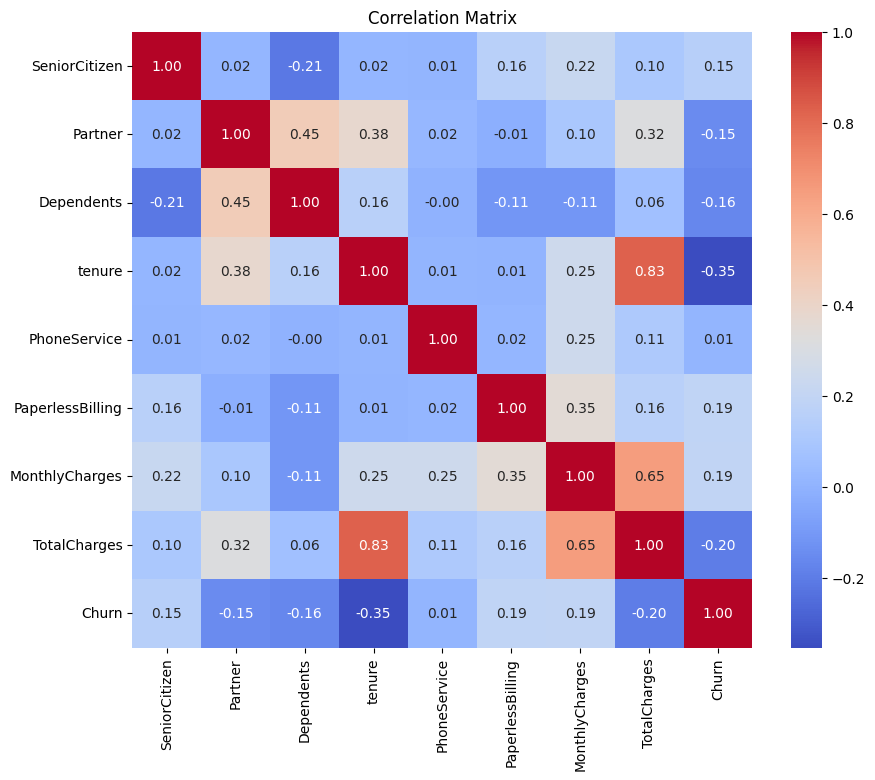

In [11]:
#Variable Relationships
print("variable relationships")
print("Correlation Matrix:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)
#Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



                  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
SeniorCitizen          1.000000  0.016479   -0.211185  0.016567      0.008576   
Partner                0.016479  1.000000    0.452676  0.379697      0.017706   
Dependents            -0.211185  0.452676    1.000000  0.159712     -0.001762   
tenure                 0.016567  0.379697    0.159712  1.000000      0.008448   
PhoneService           0.008576  0.017706   -0.001762  0.008448      1.000000   
PaperlessBilling       0.156530 -0.014877   -0.111377  0.006152      0.016505   
MonthlyCharges         0.220173  0.096848   -0.113890  0.247900      0.247398   
TotalCharges           0.103006  0.317504    0.062078  0.826178      0.113214   
Churn                  0.150889 -0.150448   -0.164221 -0.352229      0.011942   

                  PaperlessBilling  MonthlyCharges  TotalCharges     Churn  
SeniorCitizen             0.156530        0.220173      0.103006  0.150889  
Partner                  -0.014877 

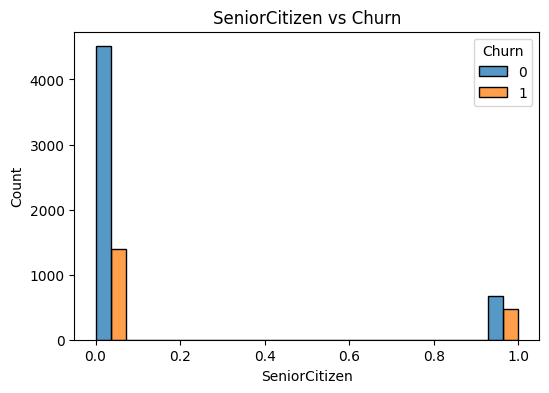

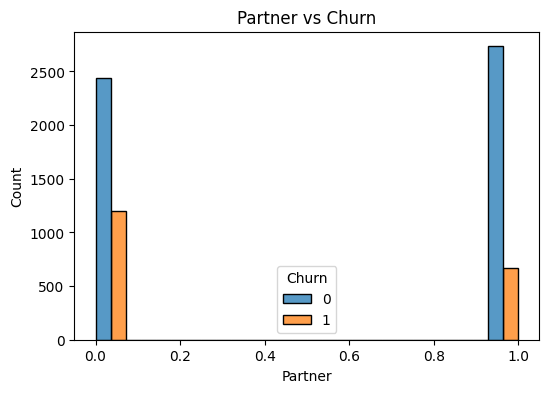

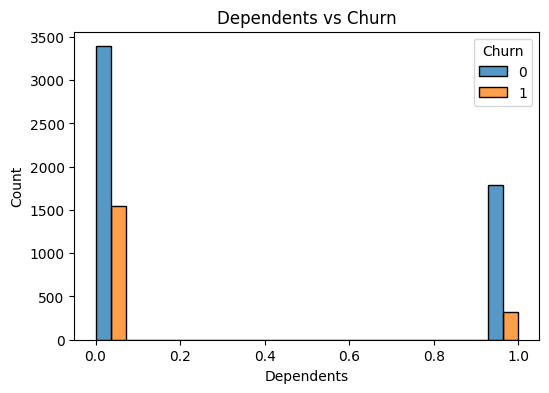

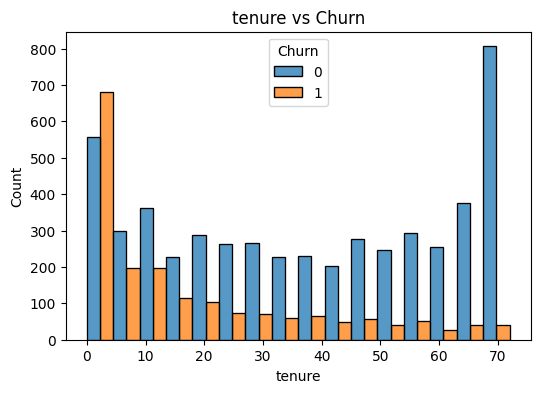

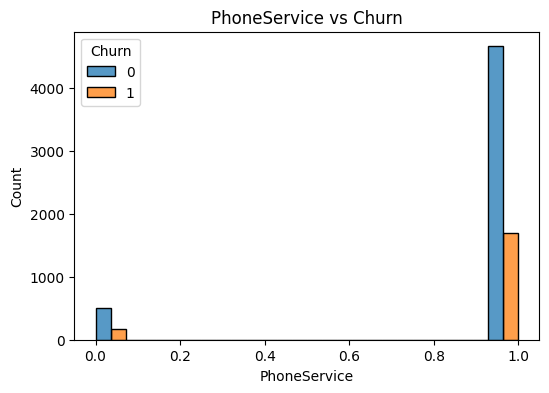

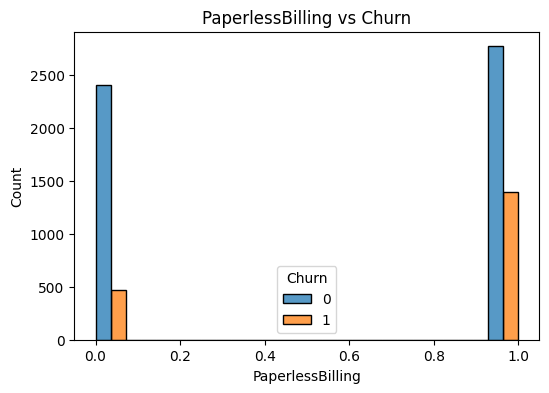

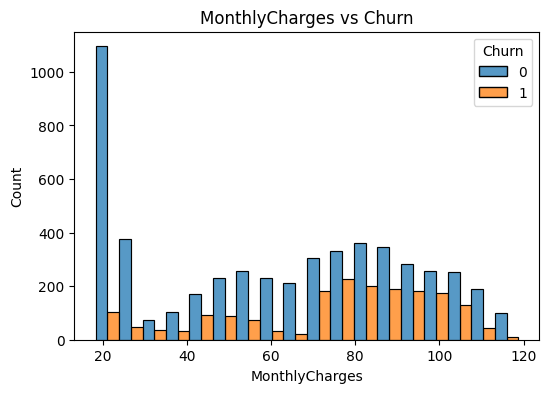

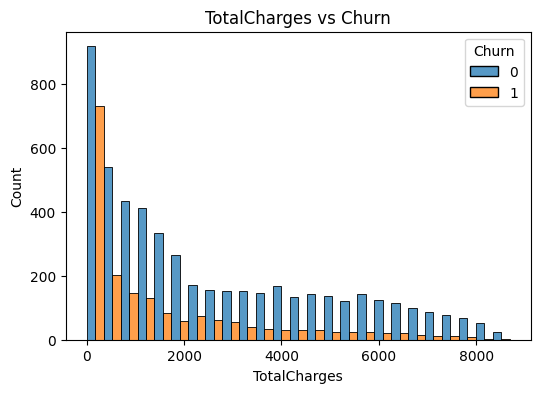

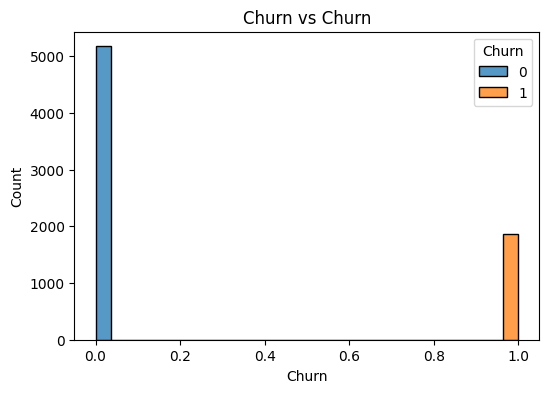

In [12]:
#Data Visualization
print(correlation_matrix)
import seaborn as sns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=df[col], hue="Churn", multiple="dodge")
    plt.title(f"{col} vs Churn")
    plt.show()

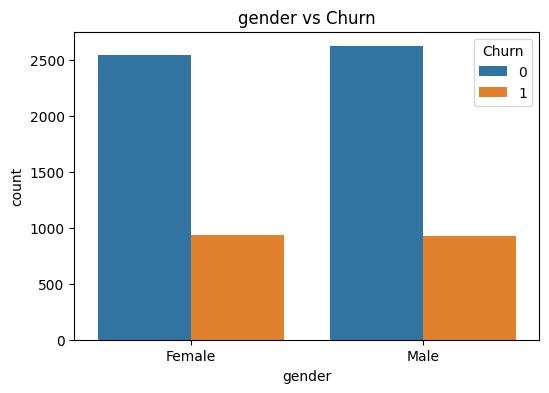

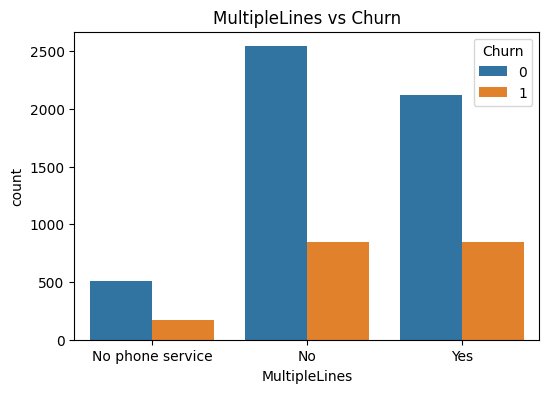

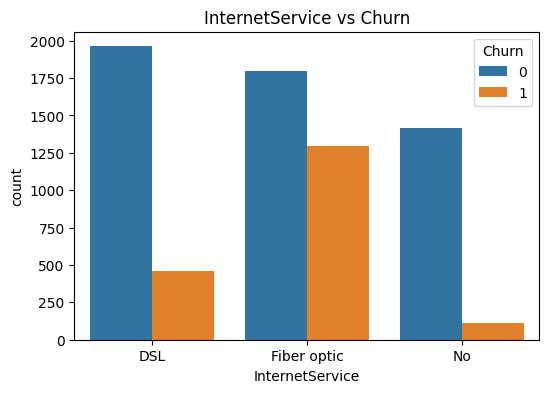

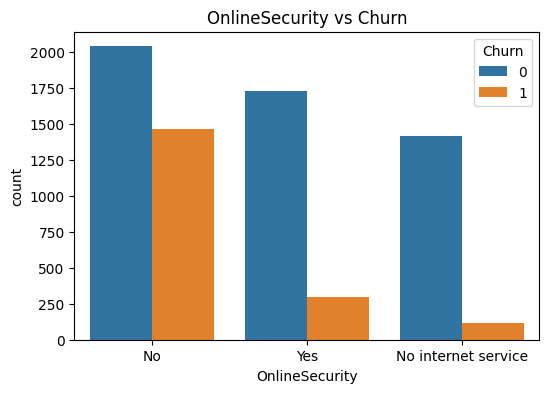

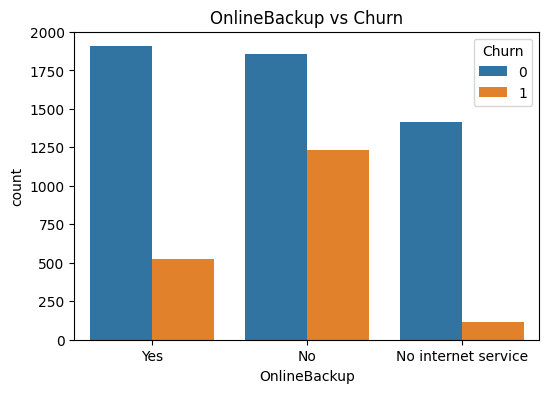

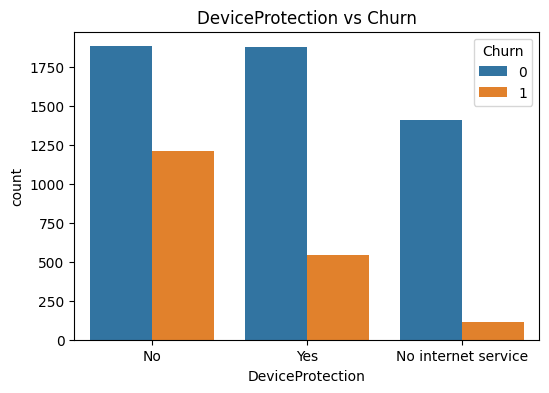

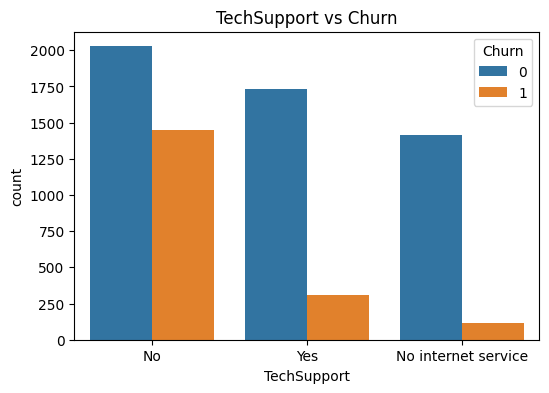

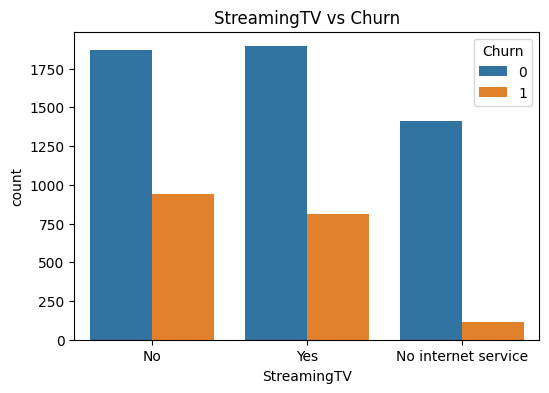

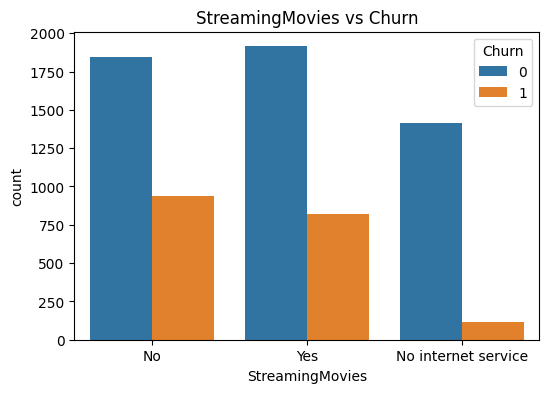

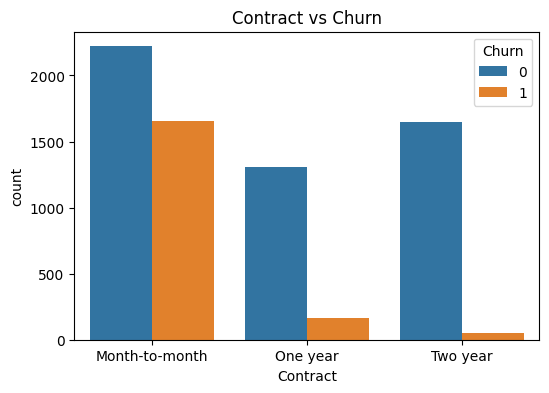

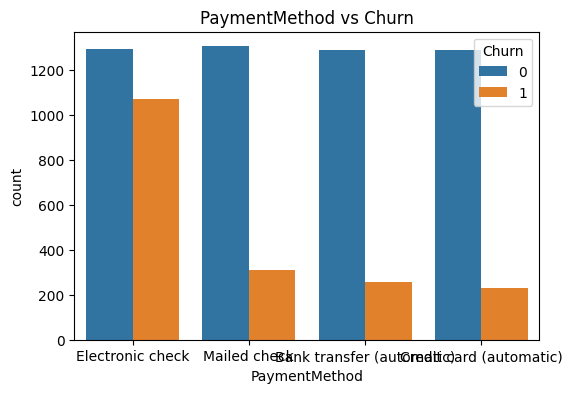

In [13]:
categorical_columns = df.drop(columns=['customerID']).select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.show()


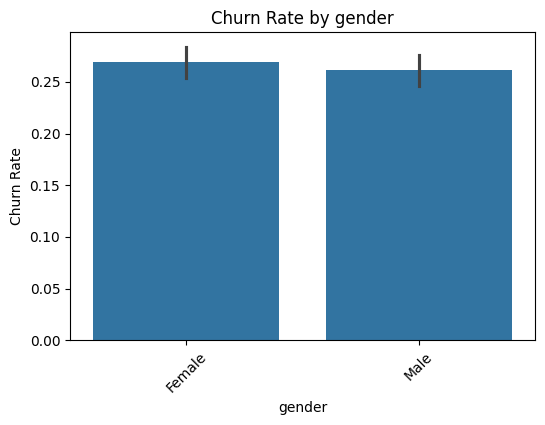

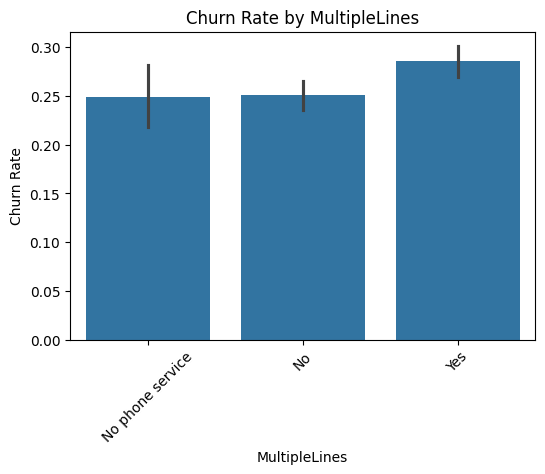

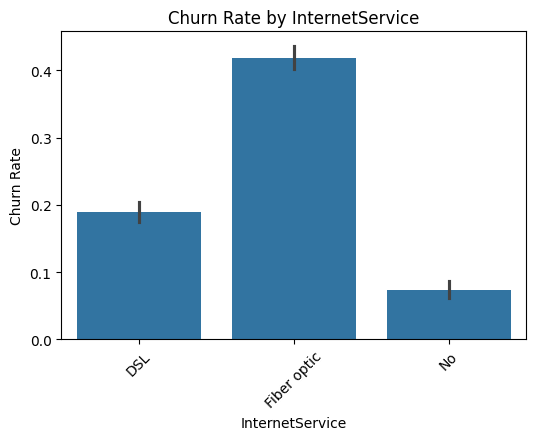

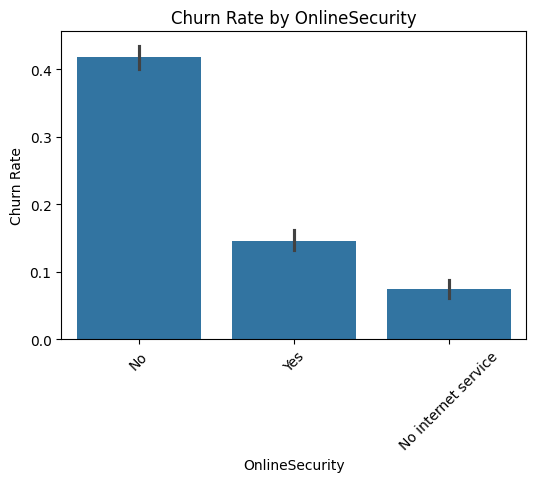

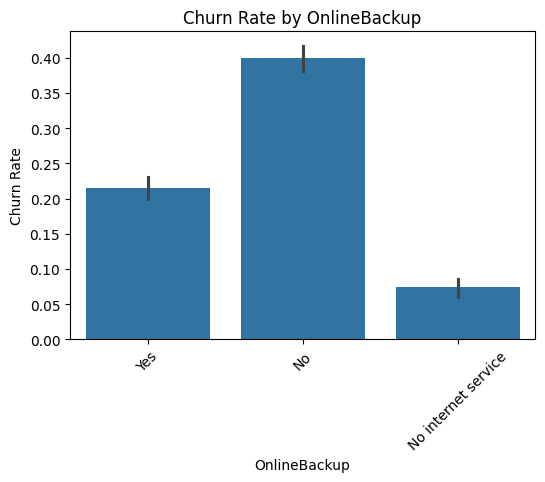

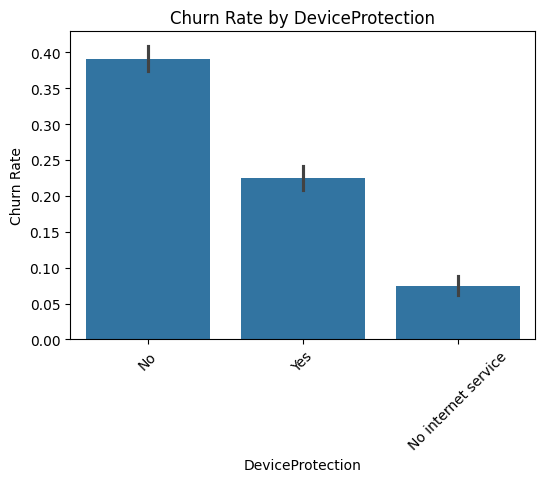

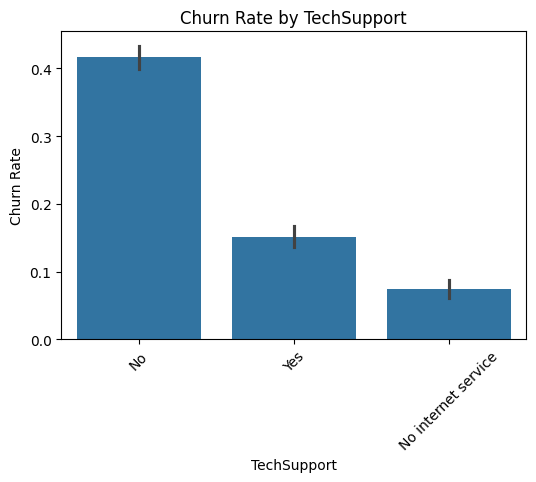

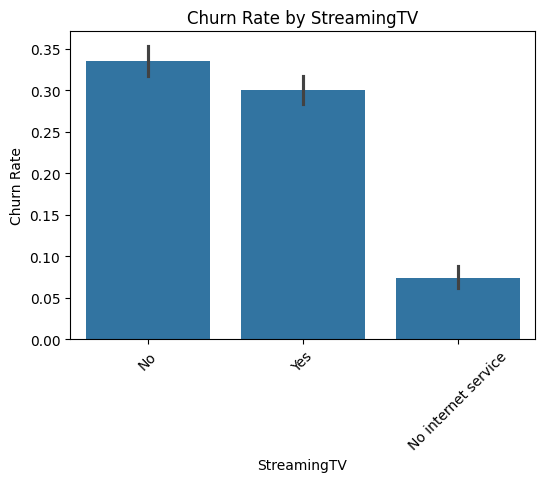

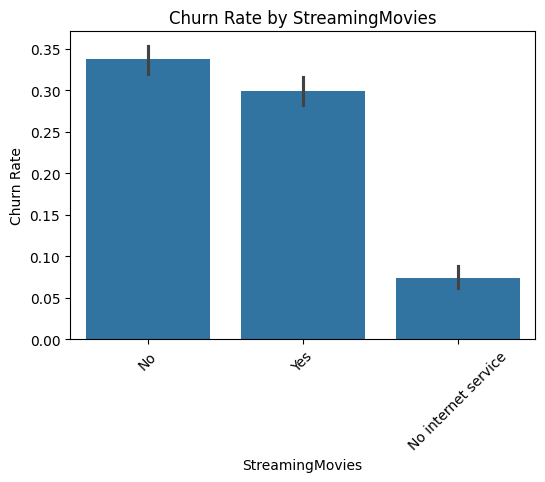

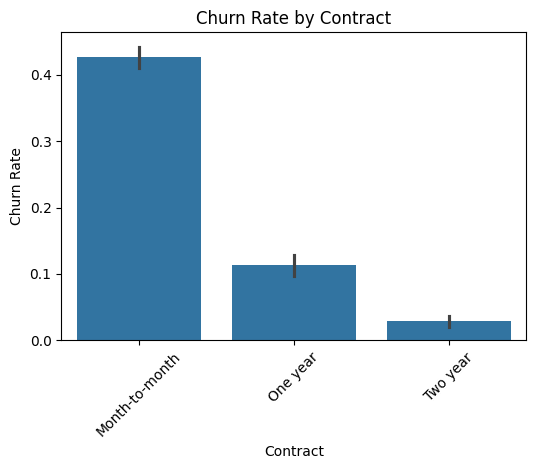

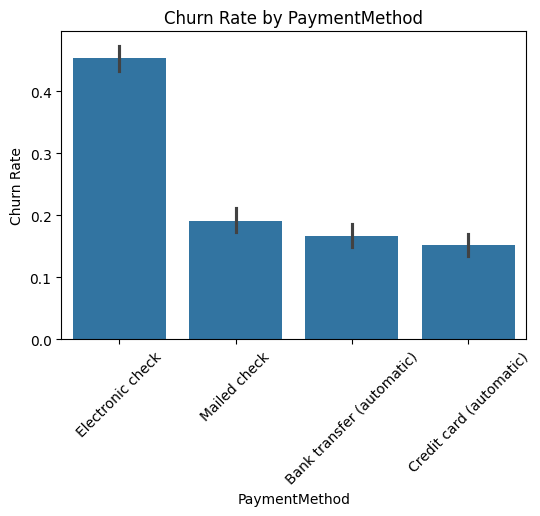

In [14]:
#"churn rate" vs categorial columns
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="Churn", data=df, estimator=lambda x: sum(x)/len(x))
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45)
    plt.show()

Regarding the exploratory data analysis above, there are some possible correlations between other variables and the churn situation.


* **For numerical variables,**

Positive correlations: monthly charges and total charges;

Negative correlations: tenure

* **For categorical variables,**

More probability to churn: seniorcitizen, no partner, fiber opics, no onlinesecurity, no onlinebackup, no deviceprotection, no techsupport, month-to month contract, electronic check.




# Linear Regression



In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
#Load daraset
X = pd.get_dummies(df.drop(columns=["Churn"]).drop(columns=["customerID"]), drop_first=True)
y = df["Churn"]
df.drop(columns=["customerID"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    for feature, coef in zip(X.columns, model.coef_):
      print(f"{feature}: {coef:.4f}")

    return model, y_pred

In [19]:
# Fit models
lr_model, lr_pred = evaluate_model(LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")
ridge_model, ridge_pred = evaluate_model(Ridge(alpha=1.0), X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression")
lasso_model, lasso_pred = evaluate_model(Lasso(alpha=0.1), X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression")


Linear Regression:
MSE: 0.14
R2 Score: 0.26
SeniorCitizen: 0.0120
Partner: 0.0012
Dependents: -0.0138
tenure: -0.0354
PhoneService: 0.0185
PaperlessBilling: 0.0238
MonthlyCharges: -0.2254
TotalCharges: -0.1102
gender_Male: 0.0014
MultipleLines_No phone service: -0.0185
MultipleLines_Yes: 0.0461
InternetService_Fiber optic: 0.1846
InternetService_No: -0.0198
OnlineSecurity_No internet service: -0.0198
OnlineSecurity_Yes: -0.0069
OnlineBackup_No internet service: -0.0198
OnlineBackup_Yes: 0.0080
DeviceProtection_No internet service: -0.0198
DeviceProtection_Yes: 0.0171
TechSupport_No internet service: -0.0198
TechSupport_Yes: -0.0052
StreamingTV_No internet service: -0.0198
StreamingTV_Yes: 0.0633
StreamingMovies_No internet service: -0.0198
StreamingMovies_Yes: 0.0634
Contract_One year: -0.0445
Contract_Two year: -0.0326
PaymentMethod_Credit card (automatic): -0.0006
PaymentMethod_Electronic check: 0.0365
PaymentMethod_Mailed check: 0.0037

Ridge Regression:
MSE: 0.14
R2 Score: 0.26
Se

<Figure size 1200x800 with 0 Axes>

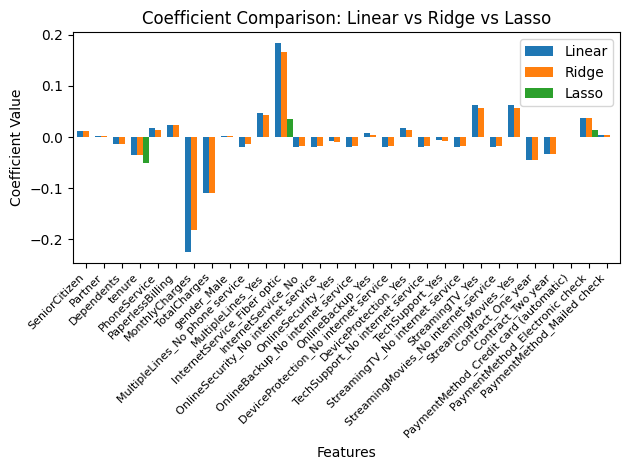

In [20]:
# Coefficient Comparison Plot
def plot_coefficients(lr_model, ridge_model, lasso_model):
    coef_df = pd.DataFrame({
        'Linear': lr_model.coef_,
        'Ridge': ridge_model.coef_,
        'Lasso': lasso_model.coef_
    }, index=X.columns)

    plt.figure(figsize=(12, 8))
    coef_df.plot(kind='bar', width=1)
    plt.title('Coefficient Comparison: Linear vs Ridge vs Lasso')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.legend(loc='best')
    plt.xticks(rotation=45, ha='right',fontsize=8)
    plt.tight_layout()
    plt.show()

plot_coefficients(lr_model, ridge_model, lasso_model)

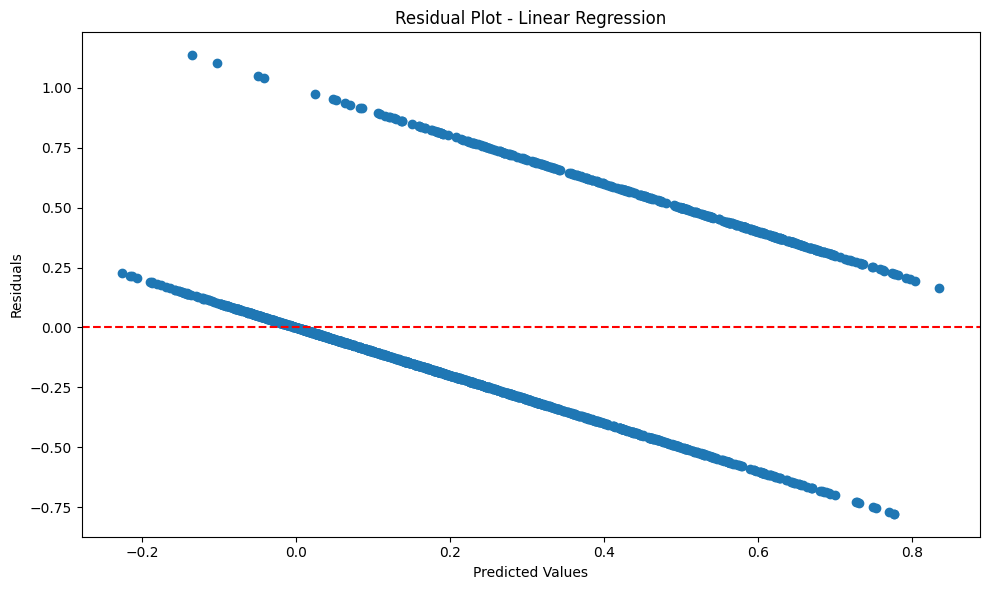

In [21]:
# Residual Plot
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, lr_pred, 'Linear Regression')


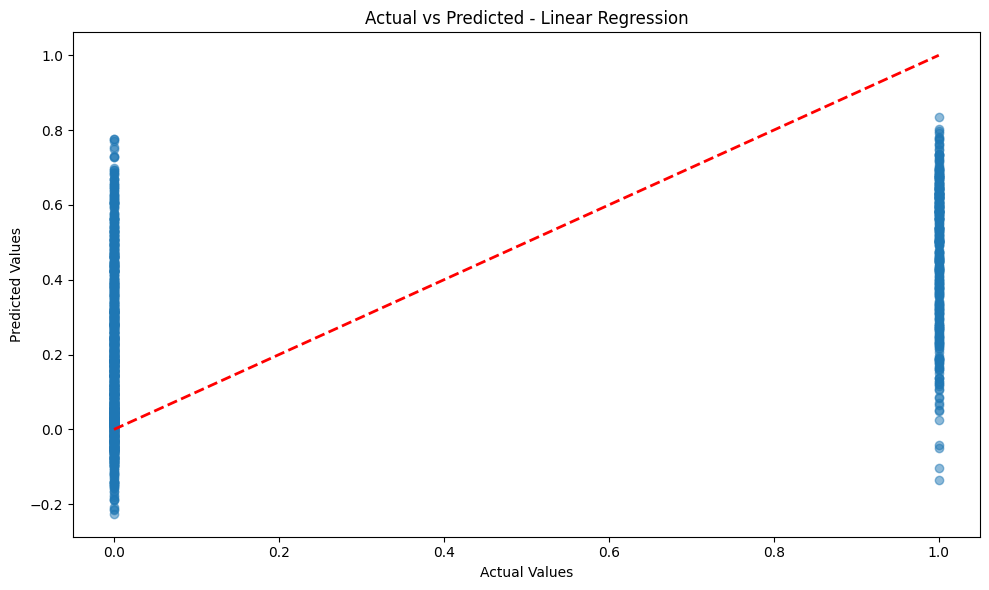

In [22]:
# Actual vs Predicted Plot
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test, lr_pred, 'Linear Regression')

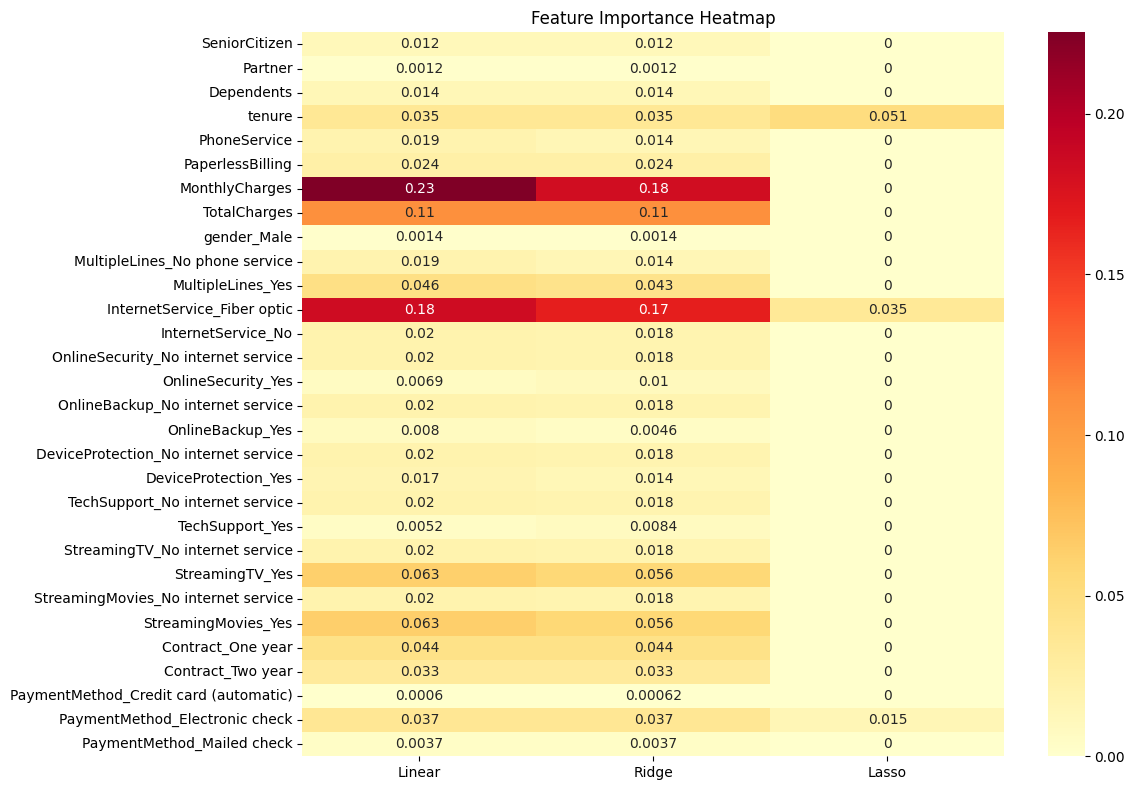

In [23]:
# Feature Importance Heatmap
def plot_feature_importance_heatmap(lr_model, ridge_model, lasso_model):
    importance_df = pd.DataFrame({
        'Linear': np.abs(lr_model.coef_),
        'Ridge': np.abs(ridge_model.coef_),
        'Lasso': np.abs(lasso_model.coef_)
    }, index=X.columns)

    plt.figure(figsize=(12, 8))
    sns.heatmap(importance_df, annot=True, cmap='YlOrRd')
    plt.title('Feature Importance Heatmap')
    plt.tight_layout()
    plt.show()

plot_feature_importance_heatmap(lr_model, ridge_model, lasso_model)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16499293693505024, tolerance: 0.1495
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1028782230876004, tolerance: 0.1495
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6890441602595274, tolerance: 0.1495
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not conve

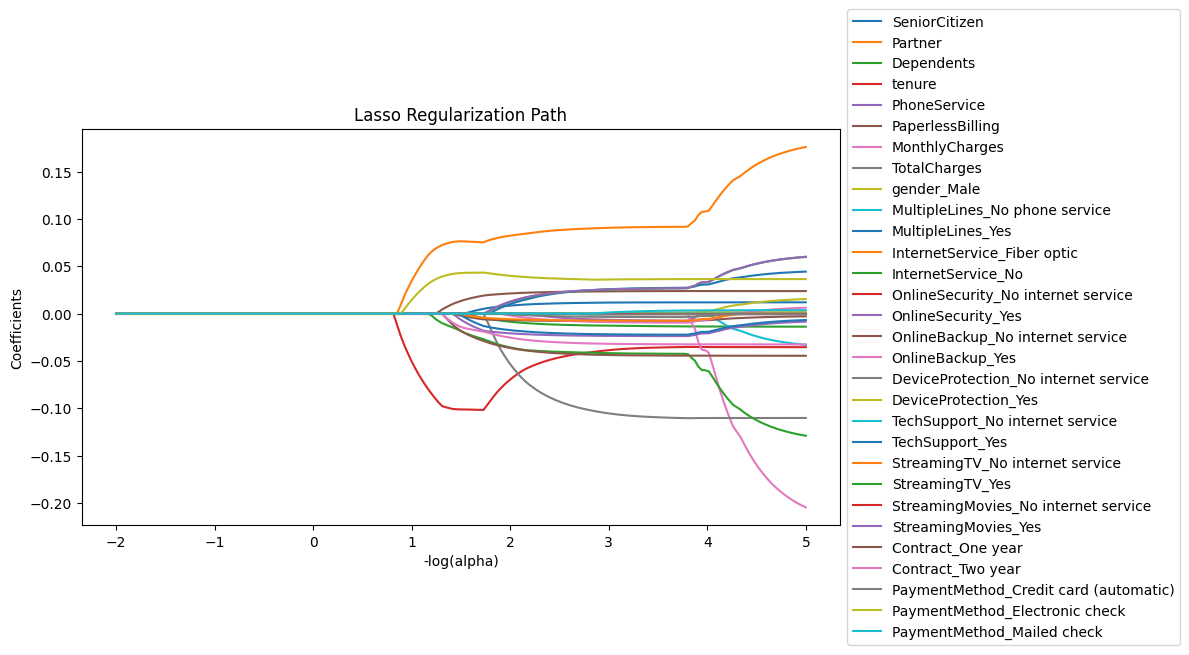

In [24]:
# Regularization Path for Lasso
from sklearn.linear_model import lasso_path

def plot_lasso_path():
    alphas, coefs, _ = lasso_path(X_train_scaled, y_train, alphas=np.logspace(-5, 2, 200))
    plt.figure(figsize=(12, 6))
    for coef_path, feature in zip(coefs, X.columns):
        plt.plot(-np.log10(alphas), coef_path, label=feature)
    plt.xlabel('-log(alpha)')
    plt.ylabel('Coefficients')
    plt.title('Lasso Regularization Path')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

plot_lasso_path()

**Model Comparison**
From the MSE and R² scores, all three regression models show relatively weak predictive power, with Lasso performing the worst.

Between Linear and Ridge, the overall performance is similar, and several coefficients stand out as significantly associated with "churn".

For example:
TotalCharges (-0.23) lowers churn risk, while Fiber optic (+0.18) and Electronic check (+0.03) increase churn. Contract length also reduces churn risk, and SeniorCitizen (+0.013) has only a small effect.

From the coefficient **comparison plot**, Linear and Ridge regression assign very similar weights to features, highlighting Fiber optic internet (+) and TotalCharges/MonthlyCharges (-) as the strongest predictors of churn. In contrast, Lasso shrinks most coefficients to zero, leaving only a few important features.

**Residual Plot & Actual vs Predicted Plot**

The residual plot shows a clear V-shaped pattern, with residuals clustering around two lines instead of being randomly scattered around 0. The actual vs predicted plot shows that linear regression produces continuous outputs that do not align well with the binary target (0/1).

This indicates that the assumptions of linear regression are violated. That's because churn is a binary outcome, making linear regression unsuitable. Logistic regression may be more appropriate for this type of problem.

**Feature Importance Heatmap**

The conclusion is similar to that of "fit models" part. The Linear & Ridge results are close, indicating that Ridge primarily prevents overfitting and does not significantly change the coefficients. They reveals the strongest predictors of churn:**TotalCharges(0.11), MonthlyCharges(0.23/0.18), and InternetService_Fiber optic(0.17/0.18).**

Lasso compresses many coefficients to zero, thus selecting several important non-zero features.**Tenure (0.051),**
**InternetService_Fiber Optic (0.035),**
**PaymentMethod_Electronic Check (0.015)**
This suggests that customer tenure, internet type, and payment method are the most critical variables to monitor for churn risk.

**Regularization Path for Lasso**
The Lasso regularization path shows how coefficients change with different regularization strengths. All coefficients are shrunk to zero when on the left side when alpha is large, meaning the model ignores most features. As moving right, only a few features such as tenure, InternetService_Fiber optic, and PaymentMethod_Electronic check emerge.This indicates Lasso's future selection ability to hignlight the most stable predictors that affect churn.

# Logistic Rgression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report
)

In [68]:
# Build a pipeline (scaling + logistic regression)
logreg_clf = Pipeline(steps=[("scaler", StandardScaler(with_mean=False) if hasattr(X_train, "toarray") else StandardScaler()),
    ("logreg", LogisticRegression(
        max_iter=1000,
        solver="lbfgs",
        n_jobs=None  # (ignored by lbfgs; keep for template clarity)
    ))
])


In [69]:
# Train
logreg_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [70]:
# Predict
y_pred = logreg_clf.predict(X_test)
# Probabilities for ROC curve / thresholding
y_proba = logreg_clf.predict_proba(X_test)[:, 1]

In [72]:
# Scalar metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
auc_ = roc_auc_score(y_test, y_proba)
print("=== Test Set Metrics ===")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1-score  : {f1:.3f}")
print(f"ROC AUC   : {auc_:.3f}\n")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

=== Test Set Metrics ===
Accuracy  : 0.807
Precision : 0.658
Recall    : 0.567
F1-score  : 0.609
ROC AUC   : 0.842

=== Classification Report ===
              precision    recall  f1-score   support

           0      0.851     0.894     0.872      1035
           1      0.658     0.567     0.609       374

    accuracy                          0.807      1409
   macro avg      0.755     0.730     0.741      1409
weighted avg      0.800     0.807     0.802      1409



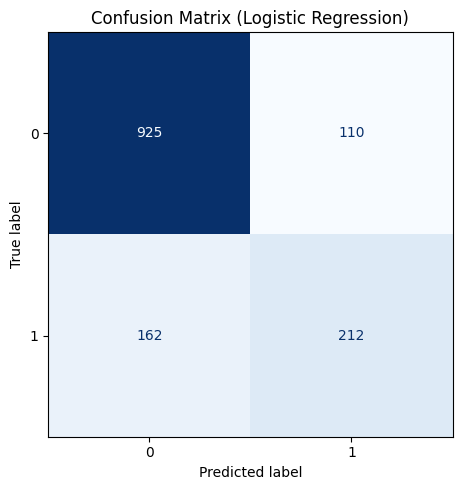

In [73]:
# Confusion Matrix (Visualization)
fig_cm, ax_cm = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax_cm, cmap="Blues", colorbar=False)
ax_cm.set_title("Confusion Matrix (Logistic Regression)")
plt.tight_layout()
plt.show()

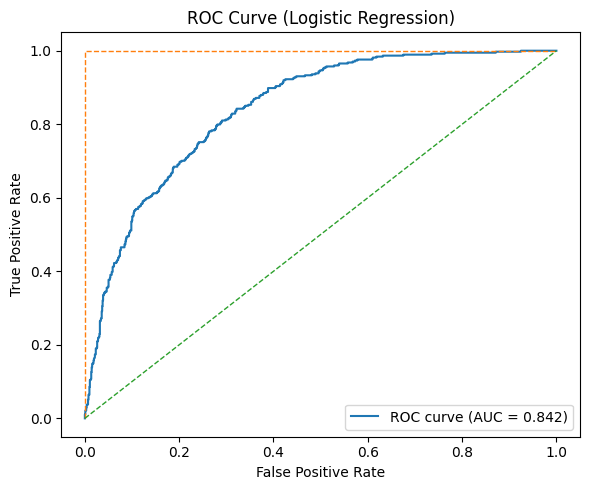

In [74]:
# ROC Curve (Visualization)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
fig_roc, ax_roc = plt.subplots(figsize=(6, 5))
ax_roc.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_:.3f})")
ax_roc.plot([0, 0, 1], [0, 1, 1], linestyle="--", linewidth=1)  # optional: corner guide
ax_roc.plot([0, 1], [0, 1], linestyle="--", linewidth=1)        # random baseline
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")
ax_roc.set_title("ROC Curve (Logistic Regression)")
ax_roc.legend(loc="lower right")
plt.tight_layout()
plt.show()

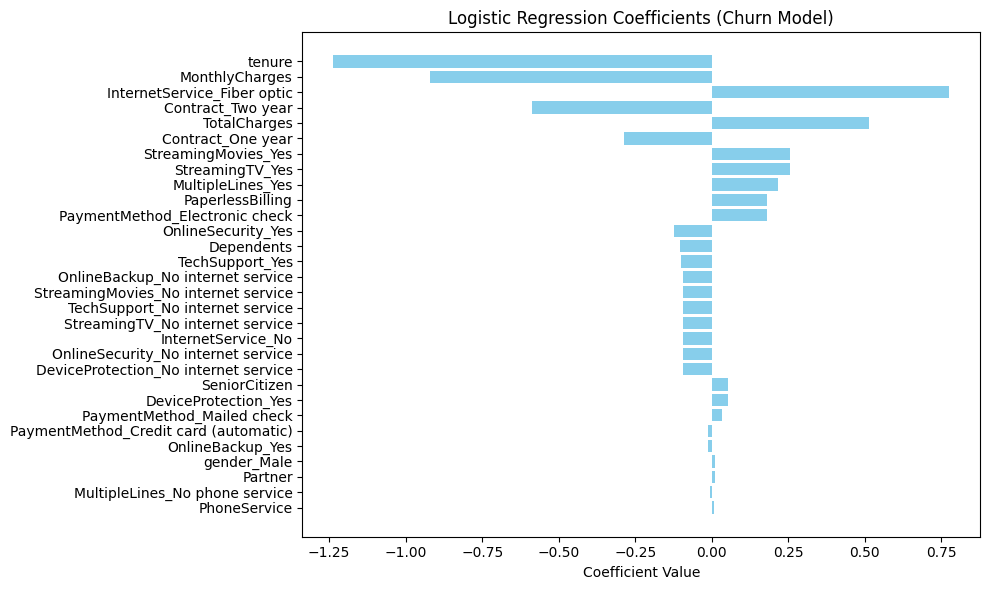

In [75]:
# Extract coefficients (assuming X_train is a DataFrame)
coef = logreg_clf.named_steps["logreg"].coef_.ravel()
features = X_train.columns if hasattr(X_train, "columns") else np.arange(len(coef))

# Put into DataFrame
coef_df = pd.DataFrame({"feature": features, "coef": coef})
coef_df = coef_df.sort_values("coef", key=lambda s: s.abs(), ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df["feature"], coef_df["coef"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Coefficients (Churn Model)")
plt.gca().invert_yaxis()  # Largest on top
plt.tight_layout()
plt.show()


> Citation: The code of the Logistic Regression is generated from ChatGPT 5.0 on 09/14/2025 at 02:02 P.M.
The link of the chat is: https://chatgpt.com/share/68c70310-5ac0-8008-bab9-06c53b91f60c, with the prompt: "help me write a logistic regression code: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. I already have X_train (cleaned), y_train(the churn) and X_test, y_test datasets. I want the train, the evaluation processs and a visualization of matrix and curve"



**Interprete**

The accuracy of this model is 0.8, which is not bad, but the recall is poor, which means that the prediction of customers who will churn is relatively inaccurate.

As for the coefficients, it can be seen from the coefficient table that Tenure, Monthlycharges and Contact-Two Year have the greatest negative impact on the overall churn rate; while Internetservice_Fiber Optic and Totalcharges have the greatest positive impact.

Although TotalCharges should be associated with a lower churn rate intuitively, it presents a positive coefficient in the multivariate logistic regression. This may be because TotalCharges is highly correlated with tenure and MonthlyCharges, and there is a multicollinearity problem.

# Generalized Additive Model (GAM)

In [78]:
!pip install pygam --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.0 MB/s eta 0:00:00


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, s
import seaborn as sns

In [80]:
# Initilize GAM
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))

# Find best smoothing parameters for each spline term
gam.gridsearch(X_train_scaled, y_train)

# Fit the model
gam.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gam = gam.predict(X_test_scaled)

# Calculate MSE and R^2
mse_gam = mean_squared_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print(f"GAM MSE: {mse_gam:.4f}, R^2: {r2_gam:.4f}")

gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


GAM MSE: 0.1411, R^2: 0.2766
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     36.2235
Link Function:                     IdentityLink Log Likelihood:                                -14028.5777
Number of Samples:                         5634 AIC:                                            28131.6022
                                                AICc:                                           28132.1108
                                                GCV:                                                0.1423
                                                Scale:                                              0.1406
                                                Pseudo R-Squared:                                   0.2833
Feature 

/tmp/ipython-input-2869948274.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


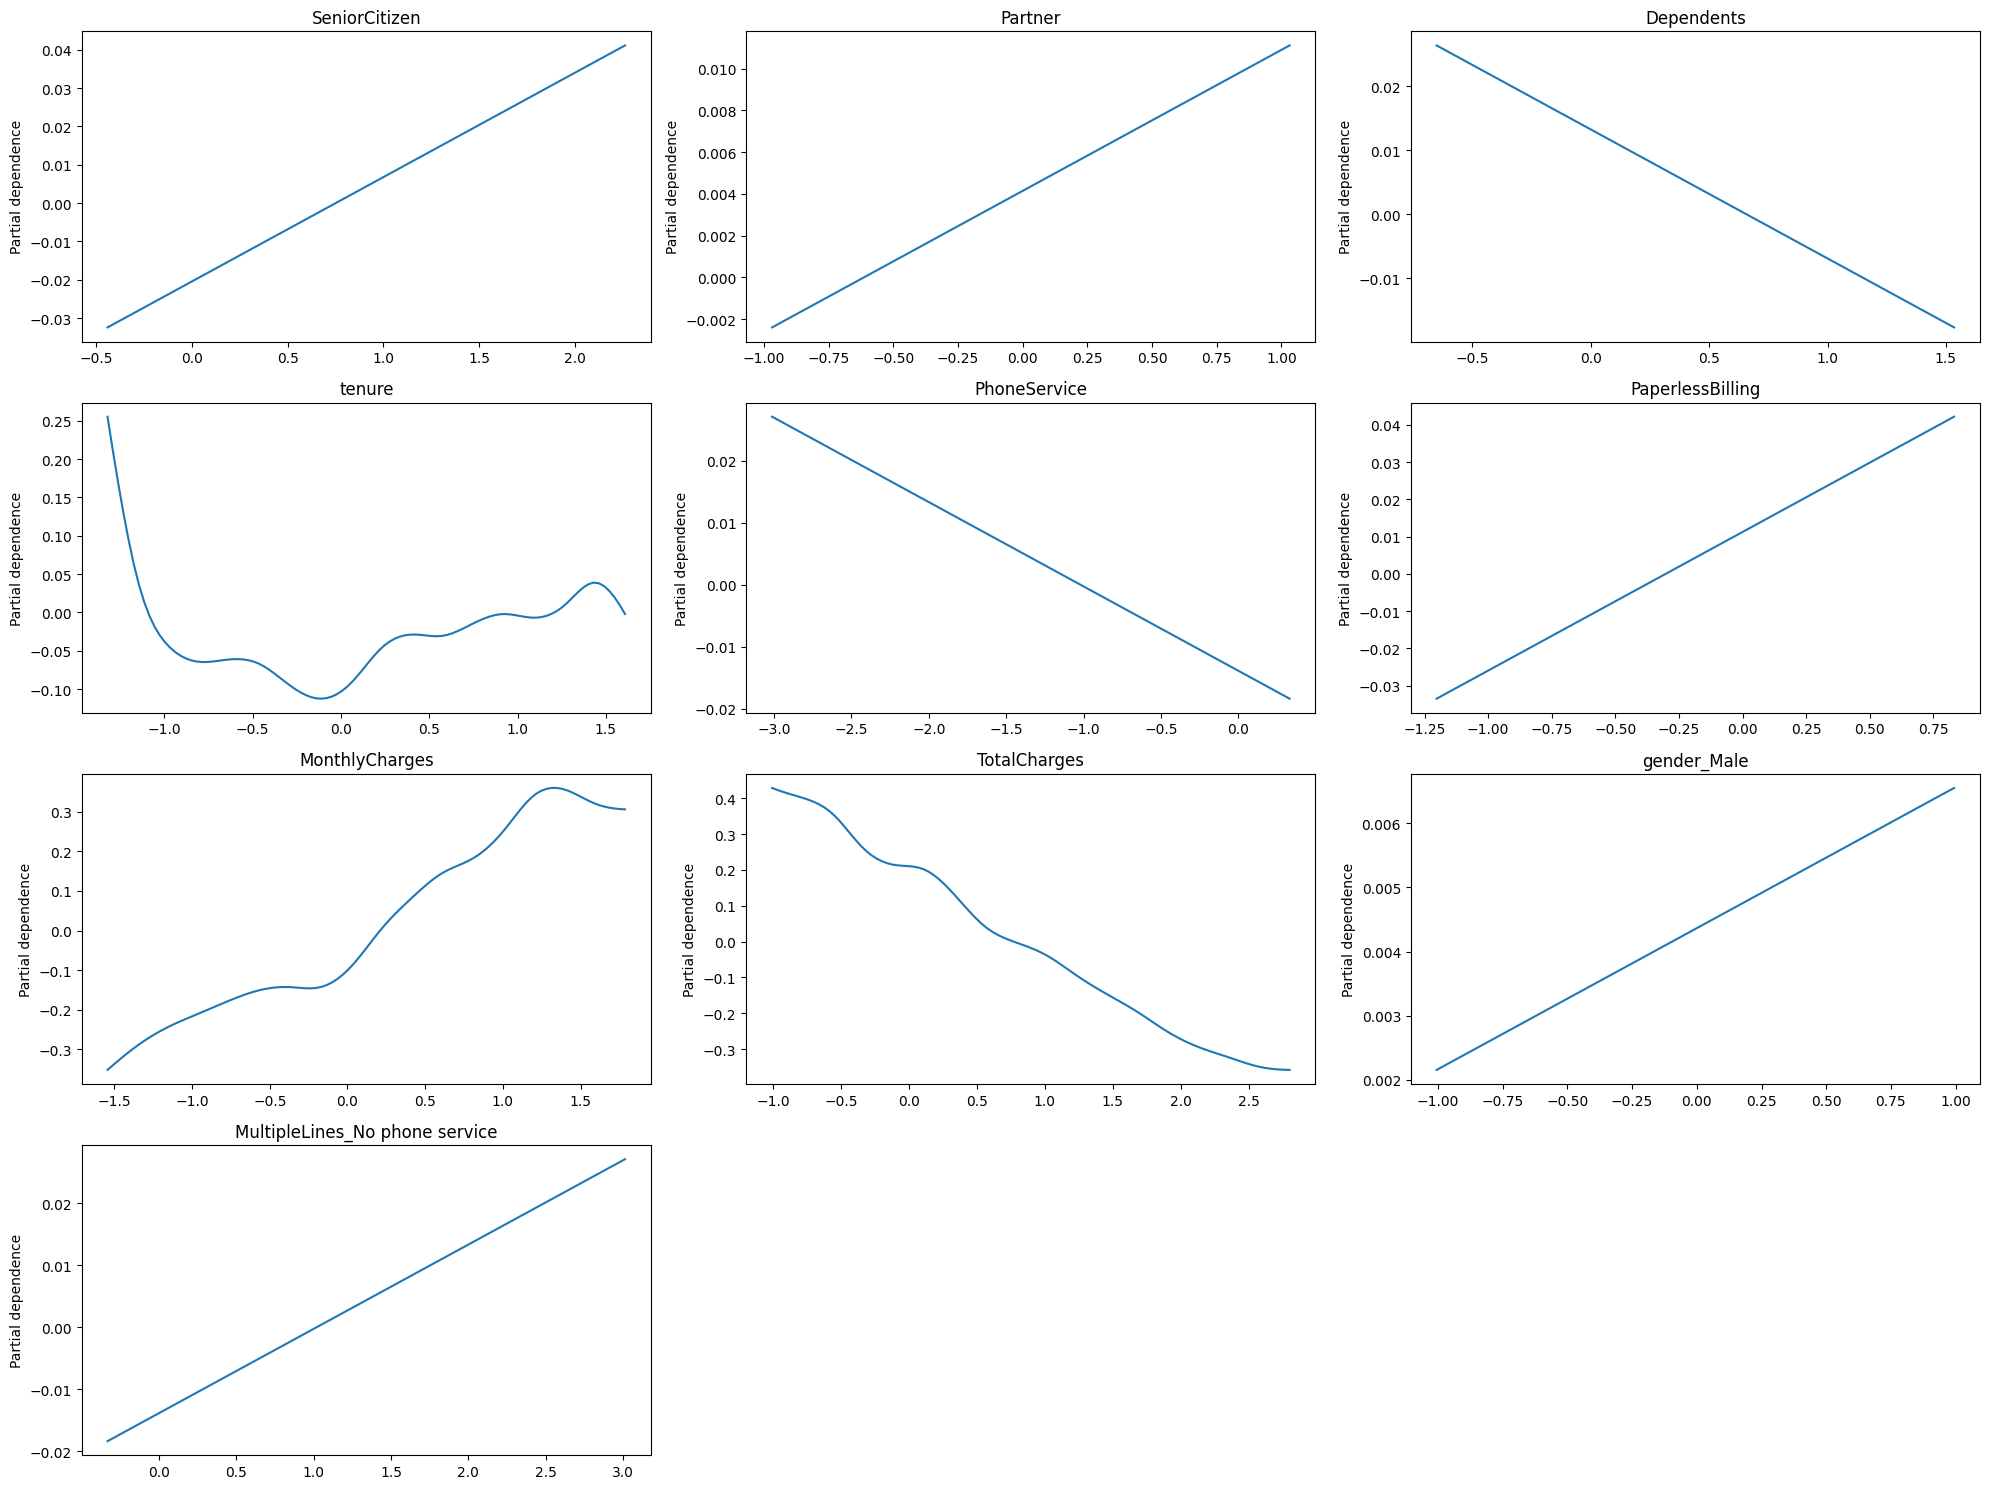

In [83]:
# Visualize GAM
plt.figure(figsize=(20, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(4, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(X_train.columns[i])
    plt.ylabel('Partial dependence')
plt.tight_layout()
plt.show()